#  Malicious-Url-Detector-Supervised Learning

# Project Topic:

The aim of this Project is to solve the problem of identifying and classifying URLs as either malicious or benign. 


# Project Goal
Malicious URLs can pose significant security risks, such as phishing attacks, malware distribution, or fraudulent activities.

By developing a machine learning model that can effectively detect malicious URLs, we can provide a valuable tool for enhancing cybersecurity. This project can be utilized in various applications, including:

   Web Browsers: Incorporating the malicious URL detector into web browsers can help protect users from inadvertently accessing malicious websites. The detector can warn users or block access to suspicious URLs, preventing them from falling victim to phishing attempts or malware downloads.

   Email Systems: Malicious URLs are often included in phishing emails, which aim to deceive recipients into revealing sensitive information. By integrating the malicious URL detector into email systems, potential threats can be identified and flagged, reducing the risk of users falling for phishing scams.

   Security Software: Security software, such as antivirus programs or firewalls, can leverage the malicious URL detector to enhance their capabilities. The detector can be integrated into these systems to provide an additional layer of defense against malicious URLs.

   Online Services: Online platforms that involve user-generated content, such as social media or forums, can utilize the malicious URL detector to automatically identify and remove or flag malicious URLs shared by users. This helps in maintaining a safe and secure environment for the platform's users.

Overall, the project of building a malicious URL detector using Random Forest aims to contribute to the prevention and mitigation of cybersecurity threats by effectively identifying and classifying malicious URLs, ultimately enhancing the security and safety of internet users.

In this Project I am going to use 2 methods:

1. Logistic Regression 
 
2. Random Forest




# Github:
    
https://github.com/mrjaiswa/Supervised-Learning-Project-Malicious-url

Model Training:
 Logistic Regression optimizes the coefficients iteratively to minimize the cost function, while Random Forest constructs an ensemble of decision trees that work together to make predictions. During the model training phase, the Random Forest classifier learns to distinguish between malicious and benign URLs based on the features extracted from the dataset. 


Steps:


Training in Logistic Regression:



   Model Initialization: In Logistic Regression, the model is initialized with random weights or coefficients. These coefficients represent the importance of each feature in predicting the target variable.

   Optimization: The model is trained by optimizing the coefficients using an optimization algorithm such as gradient descent. The algorithm iteratively adjusts the coefficients to minimize the difference between the predicted probabilities and the actual target values. The specific optimization algorithm used may vary, such as ordinary least squares or maximum likelihood estimation, depending on the implementation and problem formulation.

   Cost Function and Gradient Descent: The training process involves calculating the cost function, which measures the difference between the predicted probabilities and the actual target values. The goal is to minimize this cost function. Gradient descent is then employed to update the coefficients in the direction that reduces the cost function.

   Iterative Updates: The optimization process continues iteratively, adjusting the coefficients until the algorithm converges, reaching a point where the cost function is minimized or within an acceptable threshold. The number of iterations required may depend on the complexity of the problem and the convergence criteria set.
   
Training in Random Forest:


   Ensemble Construction: Random Forest consists of an ensemble of decision trees. During training, multiple decision trees are created, each using a random subset of the features and a bootstrapped sample of the data. This creates a diverse set of trees that collectively make predictions.

   Decision Tree Construction: Each decision tree is constructed by recursively partitioning the data based on the selected features. The splits are determined based on criteria such as Gini impurity or information gain, aiming to create subsets that are more homogenous in terms of the target variable.

   Randomness and Diversity: Randomness is introduced in Random Forest through the random feature subset selection and bootstrap sampling. This randomness helps reduce overfitting and promotes diversity among the trees, leading to better generalization and robustness.

   Voting or Averaging: During prediction, each decision tree in the Random Forest independently makes its own prediction. The final prediction is obtained by aggregating the predictions of all trees, either through majority voting (classification) or averaging (regression).

   Training Completion: The training process completes once all decision trees are constructed and the ensemble is ready for prediction. The number of trees, as well as other hyperparameters like tree depth or minimum sample split, can be tuned to optimize the Random Forest's performance.



# Sections:


1. Library Imports

2. Describing Dataset

3. EDA

4. Data Visualization

5. Vectorized data split 
    1. Logistic Regression
    2. Random Forest
    
6. Hyperparamter Tuning

7. Non Vectorized Data

    1. Logistic Regression
    2. Random Forest
8. Conclusion

9. References

# Importing Important Libraries

In [20]:


import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV


# Dataset


https://www.unb.ca/cic/datasets/url-2016.html

# **Features in  the Set**

1. url

2. type

url --> URL of the website


type--> ['phishing', 'benign', 'defacement', 'malware']

In [2]:
data = pd.read_csv("malicious_phish.csv")

In [3]:
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


How many Features and Data we have.

In [5]:
data.shape

(651191, 2)

In [6]:
col= data.nunique()

In [7]:
print(data.type.unique().tolist())

['phishing', 'benign', 'defacement', 'malware']


Trying to put the different type into the variables. 

Then I will be using this to get the wordlist.

In [8]:
phishing_URLs = data[data.type == 'phishing']
Benign_URLs = data[data.type == 'benign']
Defacement_URLs = data[data.type == 'defacement']
Malware_URLs = data[data.type == 'malware']

In [9]:
print(phishing_URLs)

                                                      url      type
0                                        br-icloud.com.br  phishing
21             signin.eby.de.zukruygxctzmmqi.civpro.co.za  phishing
28      http://www.marketingbyinternet.com/mo/e56508df...  phishing
40      https://docs.google.com/spreadsheet/viewform?f...  phishing
72                                   retajconsultancy.com  phishing
...                                                   ...       ...
651186            xbox360.ign.com/objects/850/850402.html  phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/  phishing
651188         www.gamespot.com/xbox360/action/deadspace/  phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)  phishing
651190          www.angelfire.com/goth/devilmaycrytonite/  phishing

[94111 rows x 2 columns]


Feature Extraction:
In the feature extraction phase, we extract relevant information from the URLs to represent them in a format that the machine learning model can understand. 
The choice of features plays a crucial role in determining the accuracy of the malware URL detection. During this process,

I  have observed certain patterns or trends in the dataset. 
1. http://
2. removing brackets and all

Along with that I will go ahead and tokenize that so that the model would be good to predict the urls.

/tmp/ipykernel_32/786181172.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_data.corr()


                 type_benign  type_defacement  type_malware  type_phishing
type_benign         1.000000        -0.577644     -0.317601      -0.569374
type_defacement    -0.577644         1.000000     -0.095603      -0.171390
type_malware       -0.317601        -0.095603      1.000000      -0.094234
type_phishing      -0.569374        -0.171390     -0.094234       1.000000


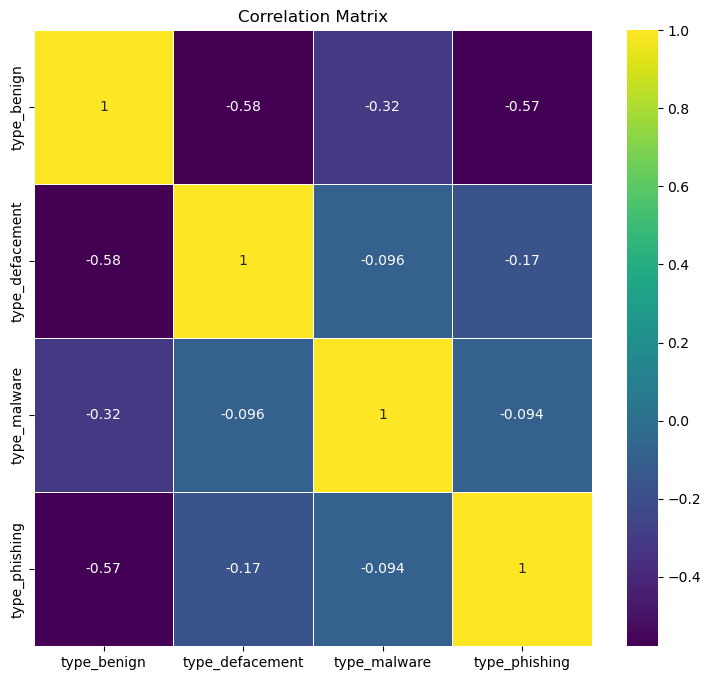

In [9]:

url_column = data['url']
type_encoded_column = data['type']

# Perform one-hot encoding on 'type_encoded'
encoded_type = pd.get_dummies(type_encoded_column, prefix='type')

# Concatenate 'url' and encoded 'type_encoded'
combined_data = pd.concat([url_column, encoded_type], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()
print(correlation_matrix)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Interpreting the matrix:**

    There is a moderate negative correlation (-0.57) between type_benign and type_defacement. It suggests that as the frequency or presence of benign URLs increases, the frequency or presence of defacement URLs tends to decrease, and vice versa.
    There is a weak negative correlation (-0.32) between type_benign and type_malware. It implies that there is a slight tendency for benign URLs to have a lower frequency or presence when malware URLs have a higher frequency or presence, and vice versa.
    There is a moderate negative correlation (-0.57) between type_benign and type_phishing. It indicates that as the frequency or presence of benign URLs increases, the frequency or presence of phishing URLs tends to decrease, and vice versa.

# Plotting the Data 

In [32]:
phishing_URLs = data[data['type'] == 'phishing']
benign_URLs = data[data['type'] == 'benign']
defacement_URLs = data[data['type'] == 'defacement']
malware_URLs = data[data['type'] == 'malware']

In [33]:
data

,url,type,type_encoded
0,br-icloud.com.br,phishing,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3


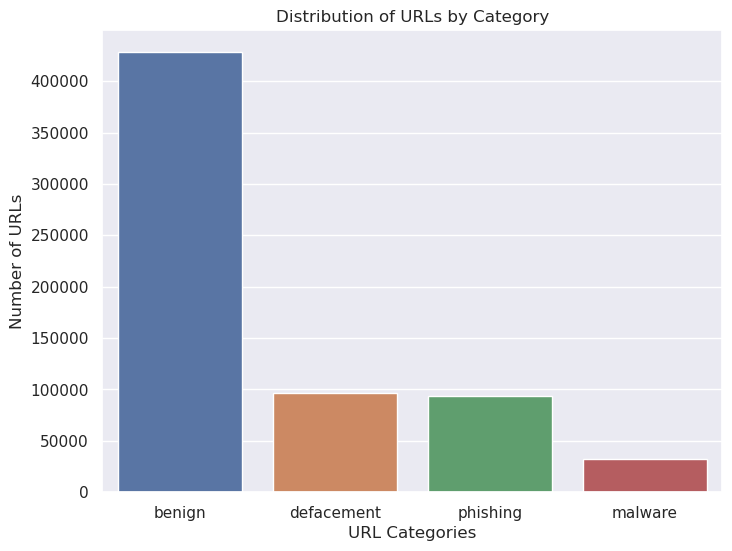

In [26]:
url_counts = data['type'].value_counts()

# Create a bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=url_counts.index, y=url_counts.values)
plt.xlabel('URL Categories')
plt.ylabel('Number of URLs')
plt.title('Distribution of URLs by Category')

# Display the plot
plt.show()

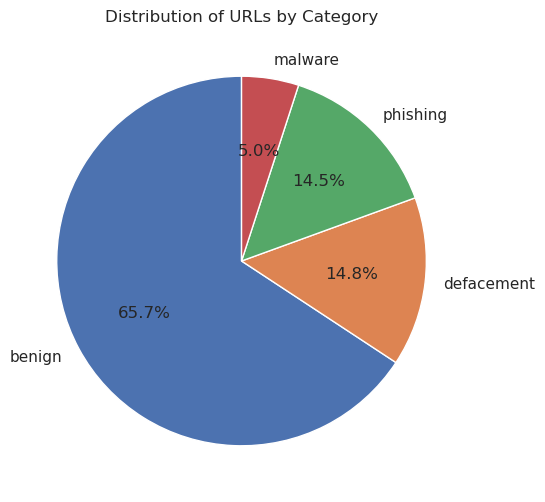

In [27]:
plt.figure(figsize=(6, 6))
plt.pie(url_counts.values, labels=url_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of URLs by Category')

# Display the plot
plt.show()

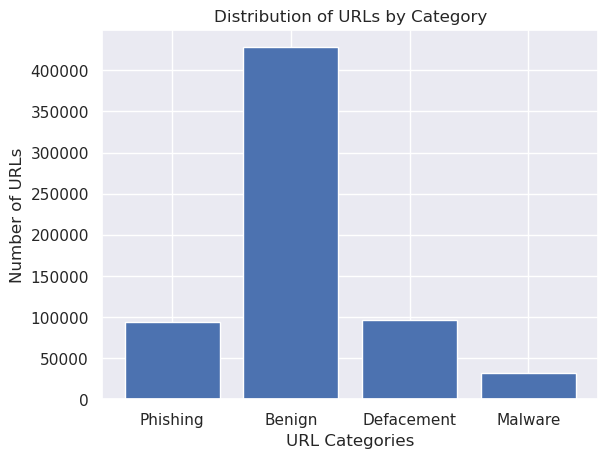

In [28]:
categories = ['Phishing', 'Benign', 'Defacement', 'Malware']
url_counts = [len(phishing_URLs), len(Benign_URLs), len(Defacement_URLs), len(Malware_URLs)]

# Create a bar plot
plt.bar(categories, url_counts)
plt.xlabel('URL Categories')
plt.ylabel('Number of URLs')
plt.title('Distribution of URLs by Category')

# Display the plot
plt.show()

# Checking for imbalance

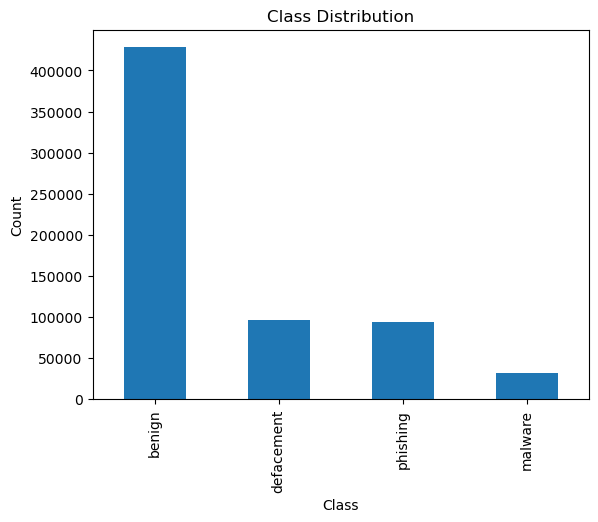

Class Proportions:
benign        65.741541
defacement    14.812398
phishing      14.452135
malware        4.993927
Name: type, dtype: float64
Class imbalance detected. Consider oversampling techniques.


In [34]:
class_counts = data['type'].value_counts()

# Visualize class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculate class proportions
class_proportions = class_counts / len(data) * 100

print("Class Proportions:")
print(class_proportions)

# Check for class imbalance
if class_proportions.min() < 5 or class_proportions.max() > 95:
    print("Class imbalance detected. Consider oversampling techniques.")
else:
    print("Class distribution is balanced.")

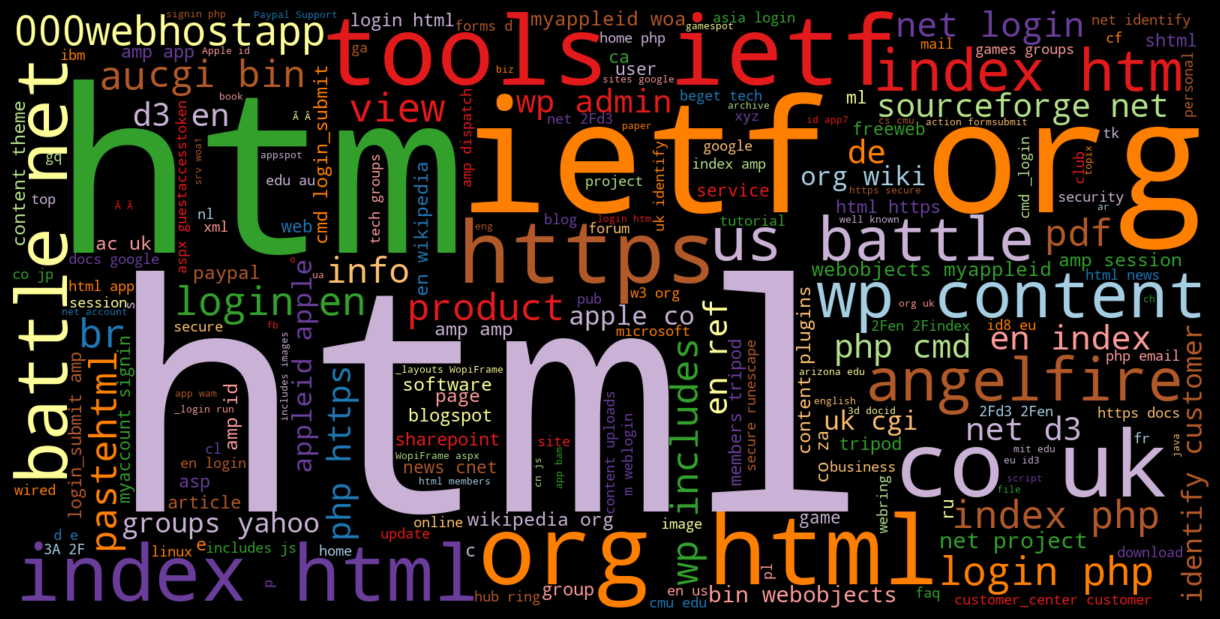

In [10]:


phish = " ".join(i for i in phishing_URLs.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



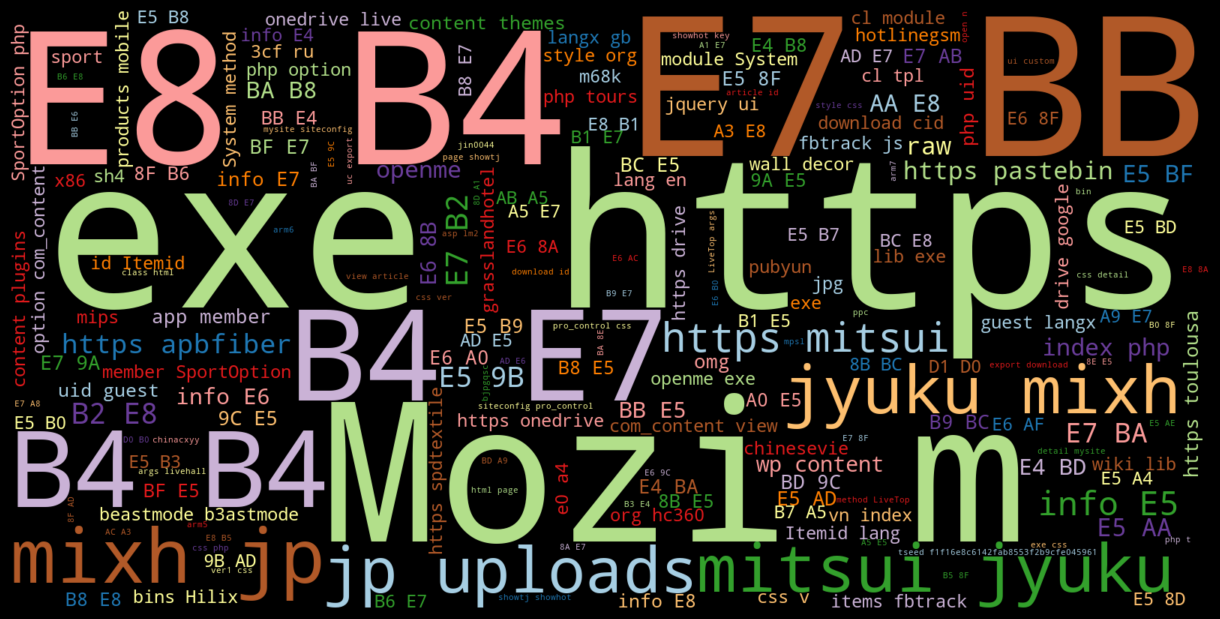

In [11]:
malware= " ".join(i for i in Malware_URLs.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

/tmp/ipykernel_32/3759155375.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numeric_data.corr()


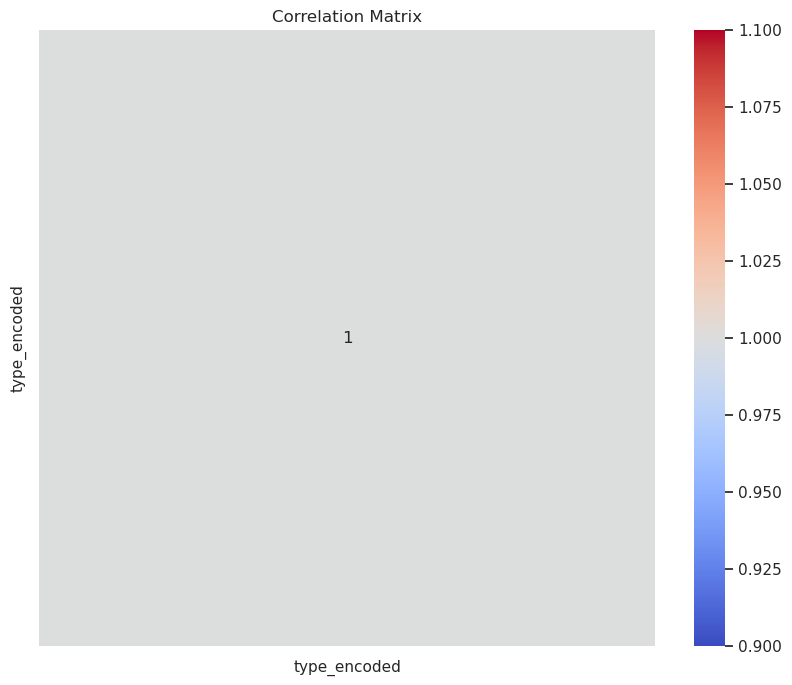

In [37]:
# Select numeric variables for correlation analysis
numeric_vars = ['type', 'type_encoded']

# Subset the DataFrame with numeric variables
numeric_data = data[numeric_vars]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

In [10]:
X, y = data['url'], data['type']

In [13]:
X.shape


(651191,)

In [14]:
y.shape

(651191,)

In [14]:
import re

def custom_tokenizer(string):
    final = []
    tokens = [a for a in list(urlparse(string)) if a]
    for t in tokens:
        final.extend(re.compile("[.-]").split(t))
    return final

A vectorizer is a preprocessing step used in machine learning and natural language processing (NLP) tasks to convert textual data into a numerical representation that machine learning algorithms can understand and process. It transforms raw text data into a numerical feature matrix, where each column represents a specific feature or aspect of the text.

Here a vectorizer converts a collection of text documents into a matrix of token counts, frequencies, or other numerical representations. The main purpose of a vectorizer is to encode the textual data in a format that can be used as input for machine learning models.

Types of Vectorizer:

    CountVectorizer: This vectorizer converts text documents into a matrix of token counts, where each element represents the frequency of a particular word (token) in each document.

    TfidfVectorizer: This vectorizer calculates the Term Frequency-Inverse Document Frequency (TF-IDF) value for each word in the document. TF-IDF reflects the importance of a word in a document relative to the entire corpus.

    HashingVectorizer: This vectorizer applies a hashing function to convert words into numerical indices. It is memory-efficient and suitable for large-scale text data processing.

In [15]:
vect = CountVectorizer(tokenizer=custom_tokenizer)

In [16]:
vect.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<651191x836956 sparse matrix of type '<class 'numpy.int64'>'
	with 3568257 stored elements in Compressed Sparse Row format>

# Applying Smote to reduce oversampling

In [17]:


X_train_resample, X_test, y_train_resample, y_test = train_test_split(X, y,  test_size=0.2,shuffle=True, random_state=0)
smote = SMOTE()
X_train, y_train= smote.fit_resample(X_train_resample, y_train_resample)


In [19]:
X_train

285003    http://www.nhs.uk/news/2015/05May/Pages/Smartp...
420615                         oakland-raiders-tickets.com/
155662    customerthink.com/blog/b2b_lead_generation_tre...
50660                        iusathletics.com/coach/0/1.php
131059                docstoc.com/docs/75683379/26May2010_2
                                ...                        
359783    healthgrades.com/physician/dr-richard-goldenbe...
152315     sourceware.org/ml/crossgcc/1998-q3/msg00067.html
117952    http://www.pidloga.com/novosti-nashego-interne...
435829    http://bicmosfoundries.com/index.php?fontfamil...
305711                      investigativeconsultantsllc.com
Name: url, Length: 520952, dtype: object

In [20]:
X_train

285003    http://www.nhs.uk/news/2015/05May/Pages/Smartp...
420615                         oakland-raiders-tickets.com/
155662    customerthink.com/blog/b2b_lead_generation_tre...
50660                        iusathletics.com/coach/0/1.php
131059                docstoc.com/docs/75683379/26May2010_2
                                ...                        
359783    healthgrades.com/physician/dr-richard-goldenbe...
152315     sourceware.org/ml/crossgcc/1998-q3/msg00067.html
117952    http://www.pidloga.com/novosti-nashego-interne...
435829    http://bicmosfoundries.com/index.php?fontfamil...
305711                      investigativeconsultantsllc.com
Name: url, Length: 520952, dtype: object

# Model Building

For this classification task we will focus on logistic regression and tree-based models since they are very flexible yet still provide good explainability. We will try out different models, inspect how they perform on our dataset and compare them to each other. The models we will use are:

**Logistic Regression**
     
 Some pros:
 
     Logistic regression provides interpretable results. The coefficients of the model can be interpreted as the impact of each feature on the predicted probability of the positive class. This makes it easier to understand and explain the relationship between the input variables and the target variable.

    Logistic regression is computationally efficient and can handle large datasets with many features. It is less prone to overfitting compared to more complex models, such as neural networks, which can be advantageous when dealing with limited data.

    Logistic regression does not assume a specific distribution for the input features. It can handle both categorical and continuous variables, making it versatile for a wide range of data types.

    Logistic regression can handle multicollinearity (high correlation between predictors) reasonably well. While high multicollinearity can affect the stability of the coefficients, logistic regression can still provide meaningful results.

    Logistic regression can be regularized to prevent overfitting. Techniques like L1 or L2 regularization can be applied to penalize large coefficient values and improve generalization performance.




   **Random Forest**
   
       Accuracy: Random Forest generally provides high prediction accuracy. By aggregating predictions from multiple decision trees, it reduces the risk of overfitting and captures complex relationships in the data.

    Versatility: Random Forest can be applied to both classification and regression tasks. It can handle a mixture of categorical and continuous features, making it versatile for various types of datasets.

    Feature Importance: Random Forest can provide information about the importance of different features in the prediction process. It ranks features based on their contribution to reducing impurity, allowing for feature selection and interpretation of the model.

    Robustness to Outliers: Random Forest is robust to outliers in the data. Outliers have a limited effect on the overall model since they are typically averaged out across multiple trees.

    Handling Missing Values: Random Forest can handle missing values in the data. It can use surrogate splits to make predictions even if some features have missing values.
   



# Logistic Regression

In [21]:


lr = LogisticRegression()
lr_pipe = Pipeline([('vect', vect), ('model', lr)])

In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV
scores = cross_val_score(lr_pipe, X, y, cv=5)

scores.mean()  

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed t

0.9248975436152864

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)



lr_pipe.fit(X_train, y_train)

preds = lr_pipe.predict(X_test)
print (confusion_matrix(y_test, preds))  

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[105045     15     17   2016]
 [     9  24112      2     56]
 [    78      7   7701    262]
 [  2319    208     40  20911]]


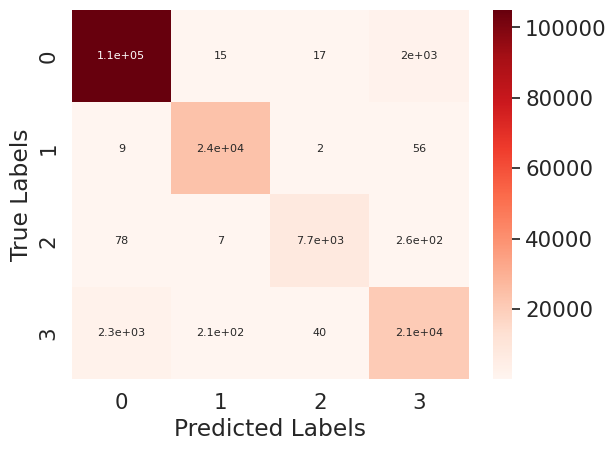

In [24]:


# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 8}, cmap="Reds")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Trying this with Different Model

#  Random Forest

In [21]:


rf_pipe = Pipeline([('vect', vect), ('model', RandomForestClassifier(n_estimators=5))])
scores = cross_val_score(rf_pipe, X, y, cv=5)

scores.mean()


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.934837796036937

# Hyperparameter Tuning:

Hyperparameter tuning refers to the process of selecting the optimal values for the hyperparameters of a machine learning model. Hyperparameters are parameters that are set before the learning process begins and are not learned from the data. They control aspects of the learning algorithm and can significantly impact the performance of the model.

The process of hyperparameter tuning involves systematically exploring different combinations of hyperparameter values and evaluating the performance of the model for each combination. 
The goal is to find the set of hyperparameters that results in the best performance, as measured by a chosen evaluation metric (e.g., accuracy, precision, recall, etc.).

Hyperparameter tuning is important because different hyperparameter values can lead to different model behaviors and performance. By tuning the hyperparameters, we aim to find the optimal configuration that maximizes the model's predictive accuracy or generalization ability on unseen data.

There are various strategies and techniques for hyperparameter tuning, including:

    Manual search: Manually selecting a set of hyperparameters based on prior knowledge and experience.

    Grid search: Exhaustively searching through a predefined grid of hyperparameter values and evaluating the model for each combination.

    Random search: Randomly sampling hyperparameter values from predefined distributions and evaluating the model for each sample.

    Bayesian optimization: Using probabilistic models to model the performance of the model as a function of hyperparameters and iteratively selecting new samples based on previous evaluations.

    Automated techniques: Utilizing automated hyperparameter optimization libraries such as Optuna, Hyperopt, or scikit-optimize that provide more advanced algorithms for efficient hyperparameter search.


Hyperparameter tuning is an iterative process that involves training and evaluating multiple models with different hyperparameter settings. It can be computationally expensive, especially for large datasets or complex models, but it is crucial for achieving optimal performance and improving the model's ability to generalize to new data.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [2, 4, 5],  # Lower values for faster training
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the data to perform the grid search
grid_search.fit(X, y)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
lr_pipe = Pipeline([('vect', vect), ('model', LogisticRegression())])

# Define the hyperparameters and their possible values
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.1, 1],
    'model__solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr_pipe, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

# Print the best hyperparameters and the accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Running the Model again this time without vectorization and also getting all the performance parameters

#  Conclusion

As a final step in this project let's talk about what did work out well and where things could be improved.

# Learnings and Takeaways

Running through a machine learning project from start to finish really shows how crucial the preparation steps like data cleaning and preparation are for model building. 
There can be also complex and hidden relationships between the data and the different models (and parameters) that make certain model improvement techniques not work out as we have seen with the feature importance. 

From this we learned if we have proper datset, we can train the machines to recognize any pattern and employ it to recognize patterns.

# What did not work

Since there were not that many features we never needed feature selection.
However I thought that if we vectorize the url text the accurcay will increase, but that didn't. So that is something I would like to try out.

# Possible Improvements

If we had more data like number of bytes transferred then the model might be more effective.
Also i would want to try deep learning on this to see how good that turns out to be,as my bet is that it wouldn't. 


# References

1. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

2. https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/

3. https://builtin.com/data-science/random-forest-algorithm


                                                                                               Mrinal Jaiswal